# Guia 1, Parte C
## Solucion numerica resolviendo la ecuacion diferencial

In [56]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [90]:
# Definición del Potencial
def Vpot(x):
    return 1/x

In [91]:
def g(y, x, E):
    return [y[1],2*(Vpot(x)-E)*y[0]]

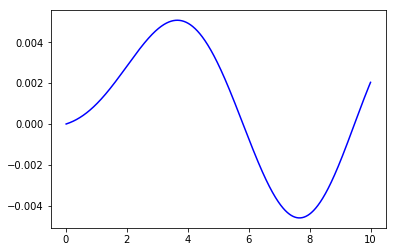

In [95]:
# Valores iniciales de phi(x) y phi’(x)
initialY = 0.0,0.0005

# Valor tentativo de E
E = 0.5

end = 10
x = np.linspace(0.01,end,1000)

# Solucion ecuación diferencial
sol = odeint(g,initialY,x,args=(E,))

# Ploteo de solución
plt.plot(x, sol[:,0], color='b')
#plt.axis([0, 10, 0, 500])
#plt.plot(x,Vpot(x),color='k')
plt.show()